In [1]:
#import important library
from sklearn.datasets import fetch_20newsgroups
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
newsgroups=fetch_20newsgroups() 
#instead of the link, you have fetched the data through sklearn itself just to reduce the amount of unnecessary work.
stops=set(stopwords.words('english'))
#these are the stopwords which we don't want to include in out vocabulary.
punctuations=list(string.punctuation)
#punctuation marks also should be removed from our vocabulary.
stops.update(punctuations)
#i have created a set of stop words and updated it with all the punctuation marks
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [3]:
all_documents=newsgroups.data
#all_documents contains all the "X" data in un-tokenized form.
all_categories=newsgroups.target
#all_cateories contain all the "Y" data.
all_documents_modified=[word_tokenize(doc) for doc in all_documents]

In [4]:
#split the data into training and testing
x_train, x_test, y_train, y_test=train_test_split(all_documents_modified, all_categories,test_size=0.25,random_state=1)

In [5]:
all_words=[] #excluding stopping words in our documents
for doc in x_train:
    for word in doc:
        if (word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!='.':
            all_words.append(word)

In [6]:
len(all_words)

1385675

In [7]:
def freq_dict(all_words): #count the frequency of words 
    dic={}
    for i in all_words:
        if i in dic:
            dic[i]+=1
        else:
            dic[i]=1
    return dic
dic=freq_dict(all_words)

In [8]:
words=np.array([i for i in dic.keys()]) #seperate works and freq
freq=np.array([i for i in dic.values()])

In [9]:
words=words[np.argsort(freq)][::-1] #sort in decending order
freq=np.sort(freq)[::-1]

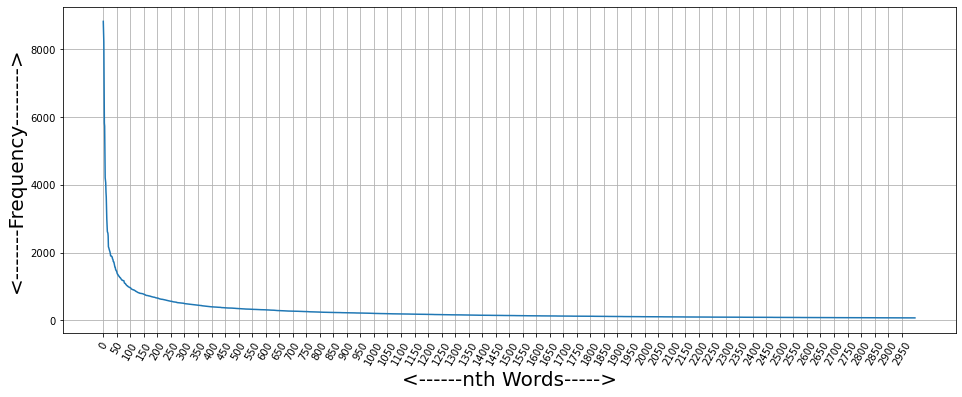

In [10]:
#plotting graph to analse the trend of graph to predict the kth stopping features
lower_limit=0
upper_limit=3000
#default value
plt.figure(figsize=(16,6))
difference_between_each_xtick=50  #default value. change these values to observe the graph in more depth
plt.plot(np.arange(len(freq))[lower_limit:upper_limit],freq[lower_limit:upper_limit])
plt.xticks(np.arange(lower_limit,upper_limit,50),rotation=60)
plt.xlabel('<------nth Words----->',size=20)
plt.ylabel('<-------Frequency-------->',size=20)
plt.grid()
plt.show()


In [11]:
feature=words[20:10000] #k cutoff to make number of features that part only

In [12]:
def modifier(x_data,feature):
    modified_2d_array=np.zeros((len(x_data),len(feature))) #created 2d matrix with 0X0 in it.
    count=0
    max_count=len(x_data)
    #loop through every row in x_data
    for i in range(len(x_data)):
        current_doc=x_data[i]
        dic={}
        #add word to the dictionary and checking also check if it already has
        for word in current_doc:
            if word in dic:
                dic[word]+=1
            else:
                dic[word]=1
        #going through the each feature in dic and find ,modify the 2d matrix according to that
        for j in range(len(feature)):
            if feature[j] in dic:
                modified_2d_array[i][j]=dic[feature[j]]
            else:
                continue
        count+=1
        #print('Progress: ',(count*100)/max_count)
    return modified_2d_array

In [13]:
x_train=modifier(x_train,feature)

In [14]:
x_test=modifier(x_test,feature)

In [15]:
x_train.shape ,x_test.shape

((8485, 9980), (2829, 9980))

In [16]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [17]:
y_pred = clf.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(y_test,y_pred))

0.8632025450689289


In [20]:
print("Training Score :", clf.score(x_train, y_train))
print("Testing Score :", clf.score(x_test, y_test))

Training Score : 0.9429581614614024
Testing Score : 0.8632025450689289


In [21]:
print("Confussion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confussion Matrix:
[[100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0
    1  10]
 [  0 125   6   9   7   4   0   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0  12 102  12   4   7   1   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   4   2 121  14   2   4   1   0   0   0   1   3   0   0   0   0   0
    0   0]
 [  0   1   0   6 124   0   5   1   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0  17   1   4   2 126   1   1   0   0   1   0   0   0   0   0   0   0
    0   0]
 [  0   3   0   7   2   0 115   6   3   2   0   2   4   0   1   0   0   0
    2   0]
 [  0   2   0   0   1   0   6 120   3   1   0   0   3   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   3 123   0   0   0   0   0   0   0   2   0
    0   0]
 [  0   2   0   1   0   0   1   1   0 129   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   2   2 130   0   0   0   0   0   0   0
    0   0]
 [  0   2   0   0   0   0   0   0   0   0   0 

In [22]:
print('Classification Report:')
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       114
           1       0.67      0.82      0.74       152
           2       0.91      0.73      0.81       139
           3       0.70      0.80      0.75       152
           4       0.75      0.90      0.82       138
           5       0.88      0.82      0.85       153
           6       0.81      0.78      0.80       147
           7       0.83      0.88      0.85       137
           8       0.89      0.94      0.91       131
           9       0.92      0.96      0.94       135
          10       0.98      0.96      0.97       136
          11       0.97      0.95      0.96       145
          12       0.88      0.72      0.79       157
          13       0.98      0.93      0.96       151
          14       0.94      0.91      0.92       155
          15       0.91      0.87      0.89       159
          16       0.89      0.94      0.91       140
    

## Implement Naive Bayes from  scratch for text classification. 

In [23]:
def fit(x_train,y_train):
    result={}
    class_values=set(y_train)
    for curr_class in class_values:
        result[curr_class]={}
        result['total_data']=len(y_train)
        curr_class_rows=(y_train==curr_class)
        x_train_current_docs=x_train[curr_class_rows]
        y_train_current_docs=y_train[curr_class_rows]
        result[curr_class]['total_count']=len(y_train_current_docs)
        num_of_words=x_train.shape[1]
        total_words=0
        for j in range(1,num_of_words+1):
            result[curr_class][j-1]=x_train_current_docs[:,j-1].sum()
            total_words+=result[curr_class][j-1]
        result[curr_class]['total_words'] = total_words
    return result

def probability(dictionary,x,curr_class):
    #we changed to np.log rather than simple numbers
    #Logarithmic probabilities are used to avoid getting multiplication of actual probabilities to zero.
    output=np.log(dictionary[curr_class]['total_count']) - np.log(dictionary['total_data'])
    for i in range(len(x)):
        #we are excluding the word which are not in the dictionary
        if x[i]!=0:
            #applied laplace
            numerator=dictionary[curr_class][i]+1
            denominator=dictionary[curr_class]['total_words']+len(x)
            probability=np.log(numerator) - np.log(denominator)
            output +=probability
    return output

def predict_single_point(dictionary,x):
    best_p=-1000
    best_class=-1
    first_run=True
    classes=dictionary.keys()
    for curr_class in classes:
        if curr_class == 'total_data':
            continue
         #find the probability that x belongs to the current class
        curr_probability=probability(dictionary,x,curr_class)
        #if the probability for current class is 
        #greater than the best_class, then update
        #the best_class and best probability
        if (first_run or curr_probability > best_p) :
            best_p=curr_probability
            best_class=curr_class
        first_run=False
    return best_class
        
def predict(dictionary,x_test):
    y_pred=[]
    for x in x_test:
        x_class=predict_single_point(dictionary,x)
        y_pred.append(x_class)
    return y_pred

In [24]:
dictionary=fit(x_train,y_train)

In [25]:
y_predict=predict(dictionary,x_test)

In [26]:
print("Training Score :", clf.score(x_train, y_train))
print("Testing Score :", clf.score(x_test, y_test))

Training Score : 0.9429581614614024
Testing Score : 0.8632025450689289


In [27]:
print(accuracy_score(y_test,y_predict))

0.8614351360904914


In [28]:
print('Confussion Matrix :' ,confusion_matrix(y_test,y_predict))

Confussion Matrix : [[101   0   0   0   0   0   0   0   1   0   0   0   0   0   0   3   0   1
    0   8]
 [  0 127   3   9   7   5   0   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0  13  93  16   3  10   1   2   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   6   1 120  13   2   4   2   0   0   0   1   3   0   0   0   0   0
    0   0]
 [  0   2   0   5 122   0   4   2   0   0   0   0   2   1   0   0   0   0
    0   0]
 [  0  19   0   3   3 122   1   1   2   0   0   0   1   1   0   0   0   0
    0   0]
 [  0   2   0   6   2   0 118   4   2   3   0   2   4   1   1   0   0   0
    2   0]
 [  0   2   0   1   1   0   6 120   3   0   0   0   3   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   4 123   0   0   0   0   0   0   0   1   0
    0   0]
 [  0   1   0   2   0   0   1   2   0 128   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   2   1   3 129   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   0   0   0   0   0

In [29]:
print('Classification Report : ',classification_report(y_test,y_predict))

Classification Report :                precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.66      0.84      0.74       152
           2       0.96      0.67      0.79       139
           3       0.69      0.79      0.74       152
           4       0.74      0.88      0.81       138
           5       0.87      0.80      0.83       153
           6       0.81      0.80      0.81       147
           7       0.82      0.88      0.85       137
           8       0.90      0.94      0.92       131
           9       0.91      0.95      0.93       135
          10       0.98      0.95      0.97       136
          11       0.94      0.97      0.95       145
          12       0.89      0.75      0.81       157
          13       0.96      0.93      0.95       151
          14       0.95      0.89      0.92       155
          15       0.91      0.89      0.90       159
          16       0.89      0.93      0.91       140
  

# COMPARISON


### We have done text classification using both sklearn implemented Multinomial Naive Bayes and using our own implemented Multinomial Naive Bayes.

we find an accuracy of 0.87 on the testing dataset using Sklearn Multinomial NB.

we find an accuracy of 0.87 on the testing dataset using own implementation of Multinomial NB.